In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.patches import Rectangle
%matplotlib inline

In [2]:
df = pd.read_csv('../data/clean_data.csv')

In [3]:
df.head()

,price,millage,location,year,make,model,city,state,accidents,owners,use,name
0,13130,34770,"Jersey City, NJ",2019,Hyundai,Elantra,Jersey City,NJ,0,1.0,Personal,Hyundai Elantra
1,22990,53762,"New York, NY",2018,Honda,Accord,New York,NY,0,1.0,Personal,Honda Accord
2,15788,24317,"Bronx, NY",2019,Ford,Fusion,Bronx,NY,0,1.0,Personal,Ford Fusion
3,4950,146988,"Brooklyn, NY",2007,BMW,X3,Brooklyn,NY,2,4.0,Fleet,BMW X3
4,4950,92136,"Brooklyn, NY",2010,Dodge,Journey,Brooklyn,NY,0,3.0,Fleet,Dodge Journey


In [4]:
#Descritive statistics Numerical Variables
df.describe()

,price,millage,year,accidents,owners
count,990.000000,990.000000,990.000000,990.000000,989.000000
mean,20998.703030,55690.438384,2015.454545,0.277778,1.609707
std,20555.694865,42604.441616,3.882169,0.671996,1.031560
min,1995.000000,261.000000,1998.000000,0.000000,1.000000
25%,11554.000000,25620.500000,2014.000000,0.000000,1.000000
50%,16566.000000,39393.500000,2017.000000,0.000000,1.000000
75%,23214.250000,82899.500000,2018.000000,0.000000,2.000000
max,230995.000000,232753.000000,2020.000000,5.000000,7.000000


In [5]:
#Descritive statistics Categorical Variables
df.describe(include=np.object)

,location,make,model,city,state,use,name
count,990,990,990,990,990,990,990
unique,73,40,221,73,2,2,221
top,"New York, NY",Ford,Accord,New York,NJ,Personal,Honda Accord
freq,188,119,45,188,618,836,45


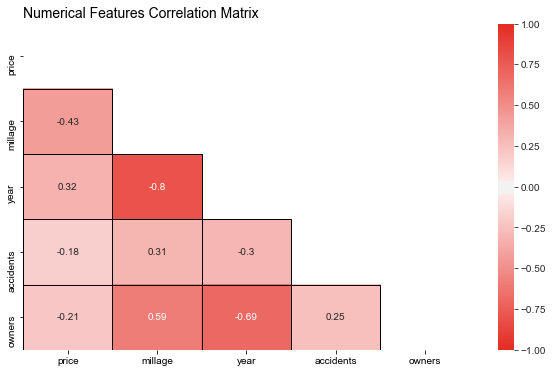

In [6]:
# Numeric variables correlation
cmap = sns.diverging_palette(13, 13, s=90, n=5, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("ticks")
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
ax = sns.heatmap(corr,mask=mask, annot=True, 
            cmap=cmap, vmin = -1, vmax = 1)
plt.title("Numerical Features Correlation Matrix", loc="left", fontsize=14)

#Just adding bolders to the rectangles
cols = [0,0,0,0,1,1,1,2,2,3]
rows = [1,2,3,4,2,3,4,3,4,4]
c_r = list(zip(cols,rows))
for i in range(len(c_r)):
    ax.add_patch(Rectangle(c_r[i], 1, 1, edgecolor='black', fill=False, lw=1))

plt.show()

There seems to be a strong negative correlation between year with millage, and year with owners. Which is expected as the older the car the more milles could have and most likely will have multiple owners in its history. For the label ,price, millage seems to be the most correlated.

state,NJ,NY
use,,
Fleet,101,53
Personal,517,319


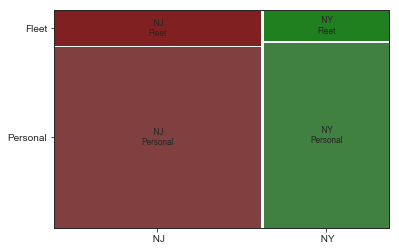

In [7]:
#Comparing selling state with type of use
dfc1 = df[['state', 'use']]
fig, ax = plt.subplots(figsize=(6,4))
mosaic(dfc1,['state','use'], gap=0.01, ax=ax)
dfc1.pivot_table(index='use', columns='state', aggfunc=len)

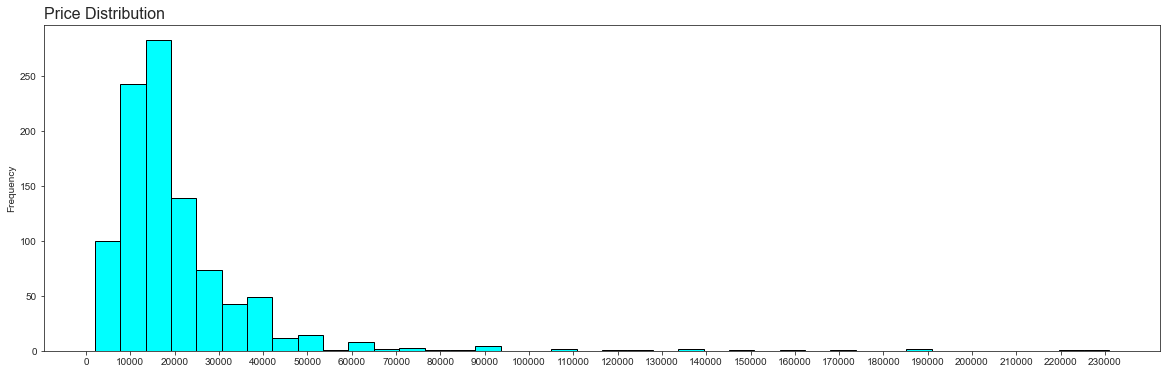

In [8]:
#Price distribution
df['price'].plot.hist(figsize=(20,6), edgecolor='k', color='cyan', bins=40)
plt.xticks(np.arange(0, max(df['price']), 10000.0))
plt.title('Price Distribution', loc='left', fontsize=16)
plt.show()

Price and Millage correlation: -0.4291


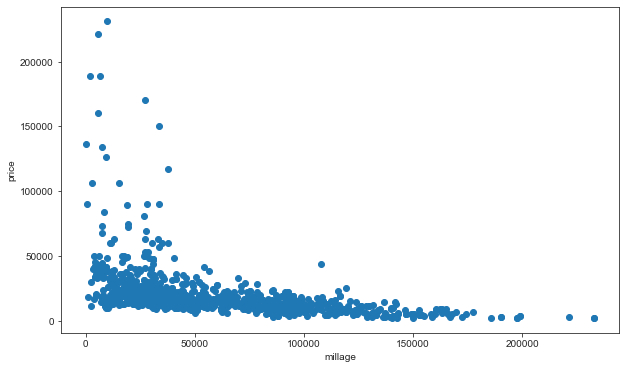

In [9]:
#Lets take a closer look a the relationship between millage and price.
print( 'Price and Millage correlation: '+ str(np.round(np.corrcoef(x = df['price'], y=df['millage'])[0][1],4)))
fs = plt.figure(figsize=(10,6))
plt.scatter(x = df['millage'], y=df['price'])
plt.xlabel('millage')
plt.ylabel('price')
plt.show()

As seem in the last two plots there seem to be a high amount of outliers that are skewing the distribution with a long righ tail on the price and it's also affecting the linear relationship between millage and price.

In [10]:
#A closer look at the outliers; subset of the data where price is greater than 50,000
df.loc[df['price']>50000].groupby('make').agg({'price':'max','year':'max'})
# As I was expecting they are all luxury vehicles most of them less than 5 years old.

,price,year
make,,
Audi,89995,2014
BMW,52900,2018
Bentley,105995,2008
Ferrari,149997,2013
Lamborghini,230995,2019
Lexus,62995,2017
Lincoln,52997,2019
McLaren,221500,2020
Mercedes-Benz,116901,2019


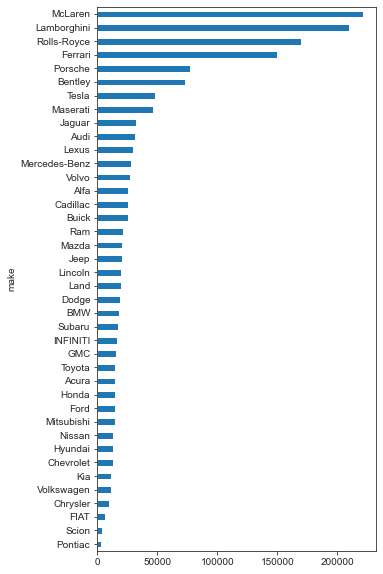

In [11]:
#Comparing the median prices accross all brands.
df.groupby('make')['price'].median().sort_values().plot.barh(figsize=(5,10))
plt.show()

In [12]:
# While it might be tempting to drop the high outliers these a high impact on the model performance.

use
Fleet       15520.961039
Personal    22007.760766
Name: price, dtype: float64


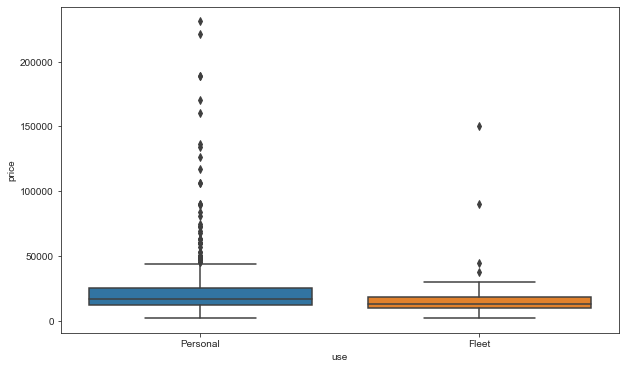

In [13]:
#Comparing Use with price
plt.figure(figsize=(10,6))
sns.boxplot(x='use',
           y='price',
           data=df)
print(df.groupby('use')['price'].mean())
plt.show()

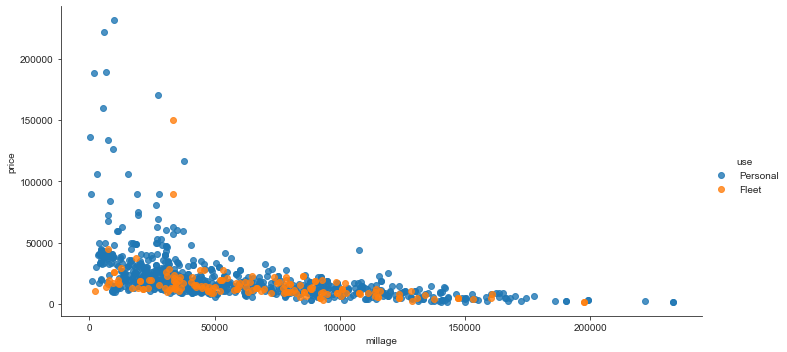

In [14]:
sns.lmplot(x='millage',
          y='price',
          data=df,
          hue='use',
          fit_reg=False,
          aspect=2)
plt.show()

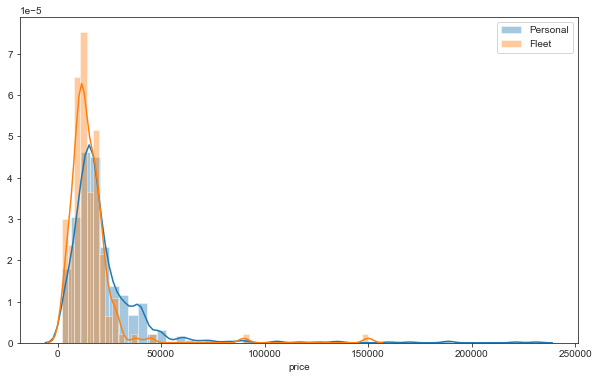

In [15]:
# The distributions both skewed to the right, and seem very similar.
plt.figure(figsize=(10,6))
sns.distplot(df.loc[df['use']=='Personal']['price'], label='Personal')
sns.distplot(df.loc[df['use']=='Fleet']['price'], label='Fleet')
plt.legend()
plt.show()

In [16]:
#Does use has any effect on price, do they belong to the same distribution?

#Hypothesis Testing
# Signigicant level = 0.05
# H0: The mean price for Personal use and Fleet use are the same
# H1: The means are different

from scipy.stats import ttest_ind
stat, p = ttest_ind(df.loc[df['use']=='Personal']['price'], df.loc[df['use']=='Fleet']['price'])

print('stat=%.3f, p=%.4f' % (stat, p))

stat=3.621, p=0.0003


In [17]:
# The results seems to suggest difference between the use on their effect on price is statistically significant

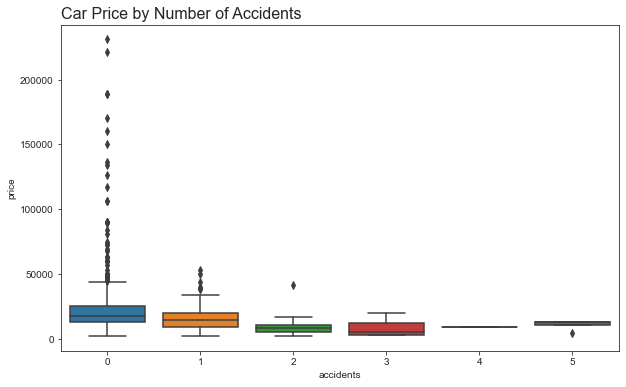

In [18]:
#Price by number of accidents
plt.figure(figsize=(10,6))
fs
sns.boxplot(x='accidents',
           y='price',
           data=df)
plt.title('Car Price by Number of Accidents', loc='left', fontsize=16)
plt.show()

In [19]:
#Obviously the price has to decrease as the car has more accidents history.

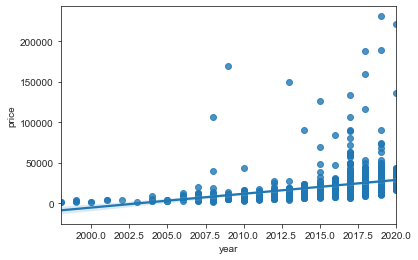

In [20]:
#Price by  year
sns.regplot(x='year',
           y='price',
           data=df)
plt.show()

In [21]:
#Checking for No available values(NA)

df.isna().sum()
#df.loc[df['owners'].isna()]

price        0
millage      0
location     0
year         0
make         0
model        0
city         0
state        0
accidents    0
owners       1
use          0
name         0
dtype: int64

In [22]:
#Creating new dataframe with no NAs
nonan = df.loc[~df['owners'].isna()]

In [23]:
np.corrcoef(x=nonan['year'], y=nonan['owners'])[1,0]

-0.694706454329639

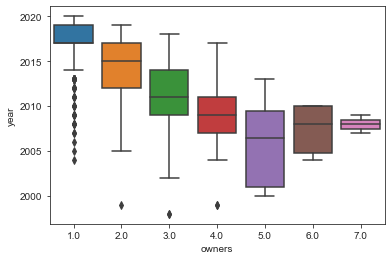

In [24]:
#It looks like there is a strong correlation between car year and number of owners which makes sense, the older the car the most owners most likely has
sns.boxplot(x='owners',y='year',data=nonan)
plt.show()

In [25]:
#Let's use this to estimate the the missing values for owners.
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(nonan['year'],nonan['owners'])

def year_owners(year):
    return np.ceil(year * slope + intercept)

In [26]:
# Replacing the NAs in owners with a linear regression, extimated with year.
df['owners'] = np.where(df['owners'].isna(),df['year'].apply(year_owners),df['owners'])

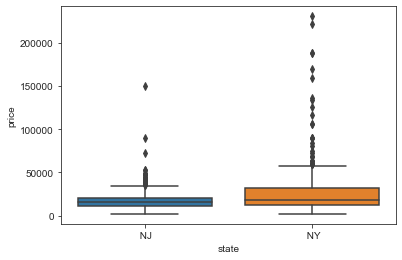

In [27]:
#Let's Check states and cities
sns.boxplot(x='state',y='price',data=df)


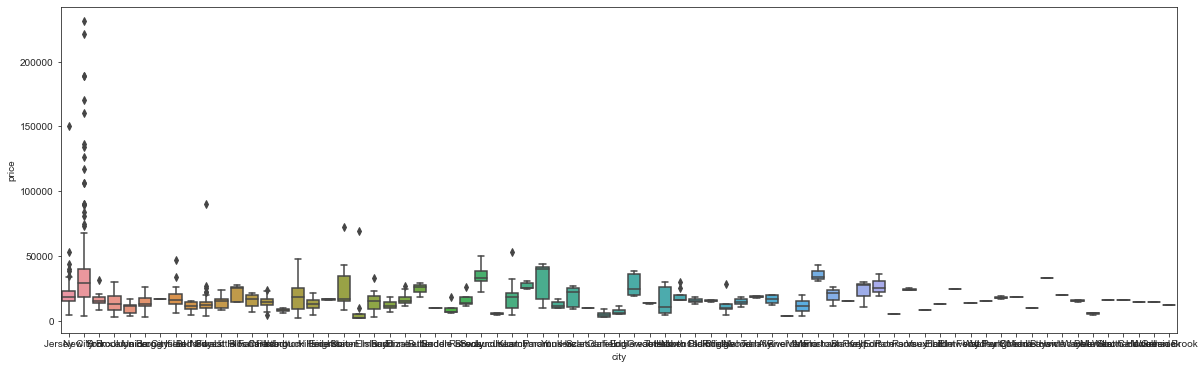

In [28]:
plt.figure(figsize=(20,6))
sns.boxplot(x='city',y='price',data=df)

In [29]:
#While these variables could be usefull in a more general model, the data is constrained to any listing in 15 miles radius from  Jersey City.

In [30]:
# Analizing Make and Model

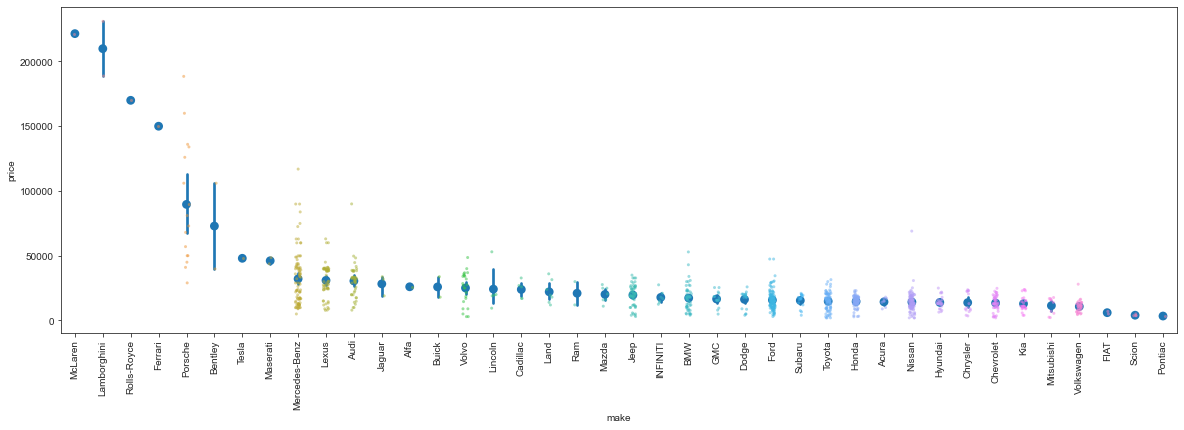

In [31]:
'''
Note from the seaborn official documentation:
A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points
and provides some indication of the uncertainty around that estimate using error bars.
(https://seaborn.pydata.org/generated/seaborn.pointplot.html#seaborn.pointplot)
'''

plt.figure(figsize=(20,6))

order_mean = df.groupby('make')['price'].mean().sort_values(ascending=False).index

sns.stripplot(x='make',
             y='price',
             data=df,
             order=order_mean,
             alpha=0.5,
             size=3)
sns.pointplot(x='make',
             y='price',
             data=df,
             join=False,
             order=order_mean)
plt.xticks(rotation=90)
plt.show()

And again we can see the jump in price when it goes over 50,000 for the luxury cars.

In [32]:
#This is the final data frame before creating the model.
df.head()

,price,millage,location,year,make,model,city,state,accidents,owners,use,name
0,13130,34770,"Jersey City, NJ",2019,Hyundai,Elantra,Jersey City,NJ,0,1.0,Personal,Hyundai Elantra
1,22990,53762,"New York, NY",2018,Honda,Accord,New York,NY,0,1.0,Personal,Honda Accord
2,15788,24317,"Bronx, NY",2019,Ford,Fusion,Bronx,NY,0,1.0,Personal,Ford Fusion
3,4950,146988,"Brooklyn, NY",2007,BMW,X3,Brooklyn,NY,2,4.0,Fleet,BMW X3
4,4950,92136,"Brooklyn, NY",2010,Dodge,Journey,Brooklyn,NY,0,3.0,Fleet,Dodge Journey


In [33]:
df.to_csv('../data/explored_data.csv', index=False)